<a href="https://colab.research.google.com/github/ZaqueMendes/Curso-Desenvolvimento-Android/blob/master/aula_1_relatorio_diario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 - Relatório de fechamento de mercado por e-mail.


### Desafio:

* Construir um e-mail que chegue na caixa de entrada todos os dias com informações de fechamento do Ibovespa e dólar.

### Passo a passo:

   **Passo 1** - Importar os módulos e bibliotecas.
   
   **Passo 2** - Pegar dados do Ibovespa e do Dólar no Yahoo Finance.
   
   **Passo 3** - Manipular os dados para deixá-los nos formatos necessários para fazer as contas.
   
   **Passo 4** - Calcular o retorno diário, mensal e anual.
   
   **Passo 5** - Localizar, dentro das tabelas de retornos, os valores de fechamento de mercado que irão pro texto  anexado no e-mail.
   
   **Passo 6** - Fazer os gráficos dos ativos.
   
   **Passo 7** - Enviar o e-mail.


In [1]:
!pip install python-dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Passo 1: Importando os módulos necessários

In [3]:
!pip install mplcyberpunk
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
from email.message import EmailMessage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Passo 2: Pegar dados no Yahoo Finance

In [4]:
ativos = ["^BVSP", "BRL=X"]

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close             Close              High                 Low  \
               BRL=X     ^BVSP   BRL=X     ^BVSP   BRL=X     ^BVSP     BRL=X   
Date                                                                           
2022-04-11    4.6981  116953.0  4.6981  116953.0  4.7326  118320.0  4.684016   
2022-04-12    4.6936  116147.0  4.6936  116147.0  4.6971  118615.0  4.621500   
2022-04-13    4.6731  116782.0  4.6731  116782.0  4.7023  117329.0  4.653200   
2022-04-14    4.6902  116182.0  4.6902  116182.0  4.7381  116781.0  4.669788   
2022-04-15    4.7010       NaN  4.7010       NaN  4.7100       NaN  4.696500   
...              ...       ...     ...       ...     ...       ...       ...   
2023-04-04    5.0631  101869.0  5.0631  101869.0  5.0976  103056.0  5.048277   
2023-04-05    5.0707  100978.0  5.0707  100978.0  5.0743  101960.0  5.027504   
2023-04-06    5.0332  100822.0  5.0332  100822.0  5.0789  101628.0  5.028911   
2023-04-07    5.0583       NaN  5.0583       NaN  5.0585       NaN  5.004350   
2023-04-09    5.0549       NaN  5.0549       NaN  5.0549       NaN  5.054900   

                        Open           Volume              
               ^BVSP   BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                       
2022-04-11  116953.0  4.6980  118320.0      0   9558400.0  
2022-04-12  116054.0  4.6936  116963.0      0  11406800.0  
2022-04-13  116150.0  4.6731  116150.0      0  12070500.0  
2022-04-14  115624.0  4.6902  116781.0      0  10365400.0  
2022-04-15       NaN  4.7010       NaN      0         NaN  
...              ...     ...       ...    ...         ...  
2023-04-04  101505.0  5.0631  101505.0      0  11695800.0  
2023-04-05   99898.0  5.0707  101869.0      0  13256500.0  
2023-04-06  100443.0  5.0332  100978.0      0   9818500.0  
2023-04-07       NaN  5.0583       NaN      0         NaN  
2023-04-09       NaN  5.0549       NaN      0         NaN  

[261 rows x 12 columns]

# Passo 3.1: Manipulando os dados - seleção e exclusão de dados 

In [5]:
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ['dolar', 'ibovespa']
dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,dolar,ibovespa
Date,,
2022-04-11,4.6981,116953.0
2022-04-12,4.6936,116147.0
2022-04-13,4.6731,116782.0
2022-04-14,4.6902,116182.0
2022-04-18,4.7006,115687.0
...,...,...
2023-03-31,5.0927,101882.0
2023-04-03,5.0623,101506.0
2023-04-04,5.0631,101869.0


# Passo 3.2: Manipulando os dados - Criando tabelas com outros timeframes. 

In [6]:
dados_fechamento_mensal = dados_fechamento.resample("M").last()
dados_fechamento_anual = dados_fechamento.resample("Y").last()

dados_fechamento_anual

,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.0332,100822.0


# Passo 4 - Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos. 

In [7]:
retorno_no_ano = dados_fechamento_anual.pct_change().dropna()
retorno_no_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_no_dia = dados_fechamento.pct_change().dropna()

retorno_no_dia

,dolar,ibovespa
Date,,
2022-04-12,-0.000958,-0.006892
2022-04-13,-0.004368,0.005467
2022-04-14,0.003659,-0.005138
2022-04-18,0.002217,-0.004261
2022-04-19,-0.010339,-0.005446
...,...,...
2023-03-31,-0.008083,-0.017654
2023-04-03,-0.005969,-0.003691
2023-04-04,0.000158,0.003576


# Passo 5 - Localizar o fechamento do dia anterior, retorno no mês e retorno no ano.

* Loc -> referenciar elementos a partir do nome
* Iloc -> selecionar elementos como uma matriz

In [8]:
retorno_dia_dolar = retorno_no_dia.iloc[-1, 0]
retorno_dia_ibovespa = retorno_no_dia.iloc[-1, 1]

retorno_mes_dolar = retorno_no_mes.iloc[-1, 0]
retorno_mes_ibovespa = retorno_no_mes.iloc[-1, 1]

retorno_ano_dolar = retorno_no_ano.iloc[-1, 0]
retorno_ano_ibovespa = retorno_no_ano.iloc[-1, 1]

retorno_ano_dolar

-0.044353334637057595

In [9]:
retorno_dia_dolar = round(retorno_dia_dolar * 100, 2)
retorno_dia_ibovespa = round(retorno_dia_ibovespa * 100, 2)

retorno_mes_dolar = round(retorno_mes_dolar * 100, 2)
retorno_mes_ibovespa = round(retorno_mes_ibovespa * 100, 2)

retorno_ano_dolar = round(retorno_ano_dolar * 100, 2)
retorno_ano_ibovespa = round(retorno_ano_ibovespa * 100, 2)

# Passo 6 - Fazer os gráficos da performance do último dos ativos

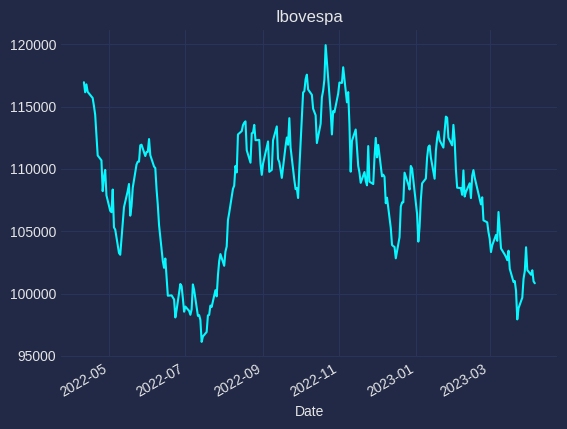

In [10]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'ibovespa', use_index = True, legend = False)

plt.title("Ibovespa")

plt.savefig('ibovespa.png', dpi = 300)

plt.show()

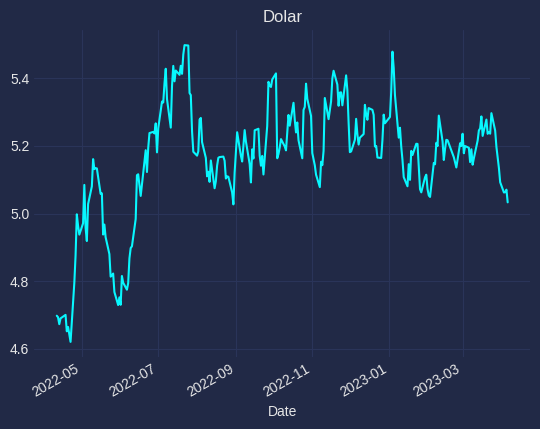

In [11]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'dolar', use_index = True, legend = False)

plt.title("Dolar")

plt.savefig('dolar.png', dpi = 300)

plt.show()

# Passo 7: Enviar e-mail

https://myaccount.google.com/apppasswords

In [12]:
import os
from dotenv import load_dotenv

In [13]:
load_dotenv()

False

In [14]:
senha = os.environ.get("senha_email")
email = 'ezeq70@gmail.com'

In [15]:
retorno_ano_ibovespa

-8.37

In [19]:
msg = EmailMessage()
msg['Subject'] = "Enviando e-mail com o Python"
msg['From'] = 'ezeq70@gmail.com'
msg['To'] = 'ezeq70@gmail.com'

msg.set_content(f'''Prezado diretor, segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_ano_ibovespa}%, 
enquanto no mês a rentabilidade é de {retorno_mes_ibovespa}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_dia_ibovespa}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_ano_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mes_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_dia_dolar}%.


Abs,

O melhor estagiário do mundo

''')

In [20]:
with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')
    
    
with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')

In [24]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    
    smtp.login(ezeq70@gmail.com, 'Correios2310@')
    smtp.send_message(msg)

NameError: ignored